In [1]:
import pandas as pd
import sklearn
import numpy as np
import util
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
import matplotlib.pylab as plt 
from dmba import regressionSummary, exhaustive_search 
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.metrics import r2_score
from dmba import backward_elimination, forward_selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [3]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', 81)

In [15]:
ultimate_df = pd.read_csv('Data/Created Datasets/ALL_merge_truncate3.csv', index_col = 0)

In [4]:
# dataset without hazardous dataset - this dataset is bigger

ultimate_df = pd.read_csv('Data/Created Datasets/Impediments_Feature_Count.csv', index_col = 0)

In [5]:
# only downtown

ultimate_df = ultimate_df[(ultimate_df['LATITUDE'] < 43.6688) & (ultimate_df['LONGITUDE'] > -79.46935) & (ultimate_df['LONGITUDE'] < -79.330700)]

In [6]:
ultimate_df.shape

(921, 20)

In [5]:
# not downtown

ultimate_df = ultimate_df[~((ultimate_df['LATITUDE'] < 43.6688) & (ultimate_df['LONGITUDE'] > -79.46935) & (ultimate_df['LONGITUDE'] < -79.330700))]

In [6]:
ultimate_df.shape

(3030, 20)

In [6]:
ultimate_df['LIGHT'] = ultimate_df['LIGHT'].apply(util.lc)
ultimate_df['TRAFFCTL'] = ultimate_df['TRAFFCTL'].apply(util.tc)
ultimate_df['DRIVACT'] = ultimate_df['DRIVACT'].apply(util.actc)
ultimate_df['DRIVCOND'] = ultimate_df['DRIVCOND'].apply(util.condc)
ultimate_df['VEHTYPE'] = ultimate_df['VEHTYPE'].apply(util.vehc)
ultimate_df['INVAGE'] = ultimate_df['INVAGE'].apply(util.agec)
#ultimate_df['MANOEUVER'] = ultimate_df['MANOEUVER'].apply(util.manc)

In [7]:
ultimate_df = ultimate_df.replace('Yes', 1).replace('<Null>', 0).replace('<Null', 0)

In [8]:
ultimate_df['TIME'] = round(ultimate_df['TIME']/100,3)

In [33]:
X = ultimate_df[[col for col in ultimate_df.columns if col not in ('COUNT', 'WARDNUM', 'LATITUDE', 'LONGITUDE', 'Latitude', 'Longitude', 'TIME', 'DRIVACT', 'VEHTYPE', 'VISIBILITY')]]
X = pd.get_dummies(X, drop_first = True)
X = sm.add_constant(X)

Y = ultimate_df['COUNT']

In [34]:
model = sm.OLS(Y, X)
results = model.fit()

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  COUNT   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     2.743
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.04e-05
Time:                        04:25:37   Log-Likelihood:                -712.53
No. Observations:                 367   AIC:                             1483.
Df Residuals:                     338   BIC:                             1596.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         1.3269      1.133      1.171      0.242      -0.902       3.556
IncidentsTotal                               -0.0012      0.001     -1.475      0.141      -0.003       0.000
SeverityScore                                19.9310      6.266      3.181      0.002       7.607      32.255
PercentOfVehicles                            -9.4176      5.528     -1.704      0.089     -20.291       1.456
AvgAcceleration                               1.1994      0.655      1.830      0.068      -0.089       2.488
INVAGE_Children                               1.7657      1.773      0.996      0.320      -1.721       5.252
INVAGE_Senior                                -0.2620      0.293     -0.893      0.372      -0.839       0.315
INVAGE_Super Senior                           0.0812      0.350      0.232      0.817      -0.608       0.770
INVAGE_Young Adult                           -0.4794      0.275     -1.743      0.082      -1.020       0.061
RDSFCOND_Loose Snow                          -0.0454      0.735     -0.062      0.951      -1.491       1.400
RDSFCOND_Other                               -0.9849      0.897     -1.099      0.273      -2.748       0.779
RDSFCOND_Packed Snow                          0.8859      1.260      0.703      0.483      -1.593       3.365
RDSFCOND_Slush                               -1.3698      0.918     -1.492      0.137      -3.175       0.436
RDSFCOND_Wet                                  0.1811      0.261      0.693      0.489      -0.333       0.695
LIGHT_Dark                                   -0.2322      0.305     -0.762      0.447      -0.832       0.367
LIGHT_Daylight                                0.3481      0.240      1.450      0.148      -0.124       0.820
LIGHT_Dusk                                    1.9784      0.767      2.580      0.010       0.470       3.487
TRAFFCTL_No Control                          -0.3370      0.837     -0.403      0.687      -1.983       1.309
TRAFFCTL_Pedestrian Crossover                 0.3552      1.516      0.234      0.815      -2.626       3.337
TRAFFCTL_Stop/Yield Sign                     -0.8249      0.878     -0.939      0.348      -2.552       0.902
TRAFFCTL_Streetcar (Stop for)                -0.7505      1.520     -0.494      0.622      -3.740       2.239
TRAFFCTL_Traffic Signal                       0.5255      0.829      0.634      0.527      -1.106       2.157
DRIVCOND_Ability Impaired (Drugs/Alcohol)     1.3754      0.796      1.728      0.085      -0.190       2.941
DRIVCOND_Fatigue                             -0.6887      1.253     -0.549      0.583      -3.154       1.777
DRIVCOND_Inattentive                          0.4113      0.728      0.565      0.572      -1.021       1.843
DRI

In [9]:
X = ultimate_df[[col for col in ultimate_df.columns if col not in ('COUNT', 'WARDNUM', 'LATITUDE', 'LONGITUDE', 'Latitude', 'Longitude', 'TIME', 'DRIVACT', 'VEHTYPE', 'VISIBILITY', 'PercentCar', 'PercentHDT', 'PercentLDT', 'PercentMDT', 'PercentMPV', 'PercentOther')]]

X = pd.get_dummies(X, drop_first = True)

# need to remove the columns with 0s in their names
# the columns with 0 in their names are the ones which are structural zeros/not applicables

#X = X[[col for col in X.columns if '0' not in col]]

In [10]:
X.shape

(921, 29)

In [11]:
Y = ultimate_df['COUNT']

train_X, valid_X, train_Y, valid_Y =  train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [20]:
# Does the model perform better than the null model?
# Our created models must be able to beat this:
# I'm comparing valid_Y to the mean of COUNT. 

regressionSummary(valid_Y, np.repeat(Y.mean(), valid_Y.shape))


Regression statistics

                      Mean Error (ME) : 0.1343
       Root Mean Squared Error (RMSE) : 2.1135
            Mean Absolute Error (MAE) : 1.6914
          Mean Percentage Error (MPE) : -54.8264
Mean Absolute Percentage Error (MAPE) : 86.1793


In [12]:
linear_model = LinearRegression()
linear_model.fit(train_X, train_Y)

LinearRegression()

In [13]:
print(regressionSummary(train_Y, linear_model.predict(train_X)))
regressionSummary(valid_Y, linear_model.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1.9104
            Mean Absolute Error (MAE) : 1.2948
          Mean Percentage Error (MPE) : -42.6717
Mean Absolute Percentage Error (MAPE) : 67.2195
None

Regression statistics

                      Mean Error (ME) : -0.1180
       Root Mean Squared Error (RMSE) : 1.6802
            Mean Absolute Error (MAE) : 1.2587
          Mean Percentage Error (MPE) : -47.4937
Mean Absolute Percentage Error (MAPE) : 70.9392


Estimating transforms: 100%|██████████| 1000/1000 [00:02<00:00, 484.23it/s]


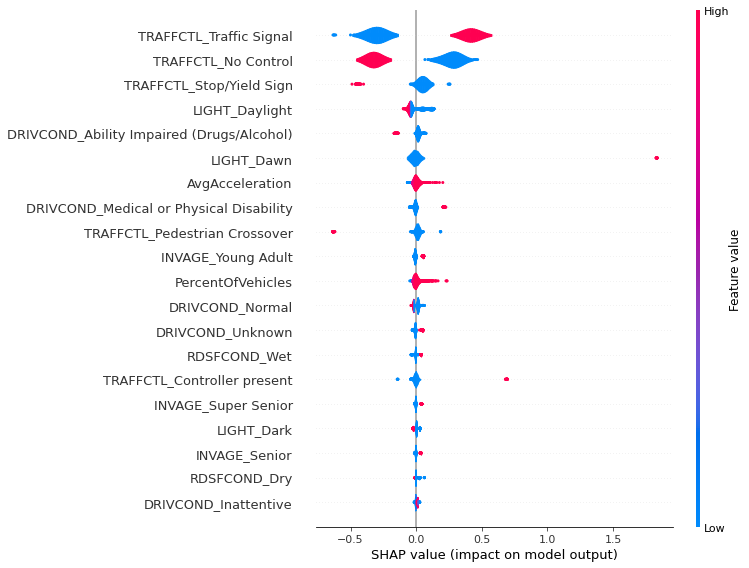

In [21]:
explainer = shap.Explainer(linear_model, masker=shap.maskers.Impute(data= X),
                           feature_names= X.columns, algorithm="linear")
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type = 'violin')

In [16]:
pd.DataFrame({'Actual': valid_Y, 'Predicted': linear_model.predict(valid_X)})

,Actual,Predicted
1872,1,1.833358
1950,1,1.772283
1800,2,1.748335
995,4,1.692615
1537,4,1.824179
...,...,...
593,3,3.013186
3782,5,3.230583
1998,1,1.551506
1062,2,2.008641


<AxesSubplot:xlabel='COUNT'>

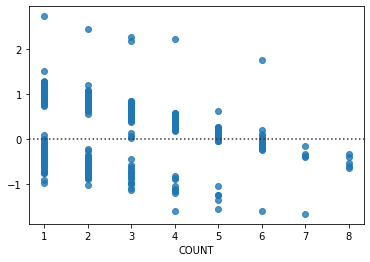

In [22]:
sns.residplot(y = linear_model.predict(valid_X), x = valid_Y)

In [23]:
pd.DataFrame({'Feature': train_X.columns, 'coefficients': linear_model.coef_}).sort_values(by = 'coefficients', ascending = False)

,Feature,coefficients
15,LIGHT_Dawn,1.633871
8,RDSFCOND_Loose Sand or Gravel,1.250665
23,TRAFFCTL_Traffic Signal,0.691140
19,TRAFFCTL_Controller present,0.685105
1,PercentOfVehicles,0.662217
27,DRIVCOND_Medical or Physical Disability,0.182091
0,AvgAcceleration,0.120435
5,INVAGE_Young Adult,0.085755
7,RDSFCOND_Ice,0.058316
17,LIGHT_Dusk,0.033479


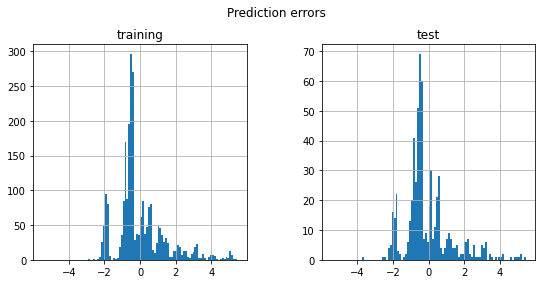

In [24]:
pred_error_train = pd.DataFrame({ 
 'residual': train_Y - linear_model.predict(train_X), 
 'data set': 'training' 
}) 
pred_error_test = pd.DataFrame({ 
 'residual': valid_Y - linear_model.predict(valid_X), 
 'data set': 'test' 
}) 

#boxdata_df = pred_error_train.append(pred_error_test, ignore_index=True) 
fig, axes = plt.subplots(nrows=1, ncols=2) 
fig.set_size_inches(9, 4) 
common = {'bins': 100, 'range': [-pred_error_test['residual'].max(), pred_error_test['residual'].max()]} 
pred_error_train.hist(ax=axes[0], **common) 
pred_error_test.hist(ax=axes[1], **common) 
#boxdata_df.boxplot(ax=axes[2], by = 'data set') 
axes[0].set_title('training') 
axes[1].set_title('test') 
#axes[2].set_title(' ') 
#axes[2].set_ylim(-50, 50) 
plt.suptitle('Prediction errors') 
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35) 
#plt.show() 

In [25]:
pred_error_train.skew()

residual    1.393199
dtype: float64

In [26]:
pred_error_test.skew()

residual    1.271926
dtype: float64

In [27]:
r2_score(valid_Y, linear_model.predict(valid_X))

0.1715599808168814

In [14]:
# these functions assume the existence of a train_Y 
def train_model(variables): 
    if len(variables) == 0: 
        return None 
    model = LinearRegression() 
    model.fit(train_X[variables], train_Y) 
    return model 
    
def score_model(model, variables): 
    if len(variables) == 0: 
        return AIC_score(train_Y, [train_Y.mean()] * len(train_Y), model, df=1) 
    return AIC_score(train_Y, model.predict(train_X[variables]), model) 

In [15]:
forwards_model, best_variables_forward = forward_selection(train_X.columns, train_model, score_model, verbose = True)

Variables: AvgAcceleration, PercentOfVehicles, INVAGE_Children, INVAGE_Senior, INVAGE_Super Senior, INVAGE_Young Adult, RDSFCOND_Ice, RDSFCOND_Loose Snow, RDSFCOND_Other, RDSFCOND_Packed Snow, RDSFCOND_Slush, RDSFCOND_Wet, LIGHT_Dark, LIGHT_Dawn, LIGHT_Daylight, LIGHT_Dusk, TRAFFCTL_Controller present, TRAFFCTL_No Control, TRAFFCTL_Pedestrian Crossover, TRAFFCTL_Stop/Yield Sign, TRAFFCTL_Streetcar (Stop for), TRAFFCTL_Traffic Signal, DRIVCOND_Ability Impaired (Drugs/Alcohol), DRIVCOND_Fatigue, DRIVCOND_Inattentive, DRIVCOND_Medical or Physical Disability, DRIVCOND_Normal, DRIVCOND_Other, DRIVCOND_Unknown
Start: score=3174.83, constant
Step: score=3068.26, add TRAFFCTL_Traffic Signal
Step: score=3066.09, add LIGHT_Dusk
Step: score=3064.69, add TRAFFCTL_Streetcar (Stop for)
Step: score=3064.69, add None


In [16]:
print(regressionSummary(train_Y, forwards_model.predict(train_X[best_variables_forward])))
regressionSummary(valid_Y, forwards_model.predict(valid_X[best_variables_forward]))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1.9276
            Mean Absolute Error (MAE) : 1.3045
          Mean Percentage Error (MPE) : -43.6810
Mean Absolute Percentage Error (MAPE) : 68.0597
None

Regression statistics

                      Mean Error (ME) : -0.1305
       Root Mean Squared Error (RMSE) : 1.6815
            Mean Absolute Error (MAE) : 1.2581
          Mean Percentage Error (MPE) : -49.0565
Mean Absolute Percentage Error (MAPE) : 71.9135


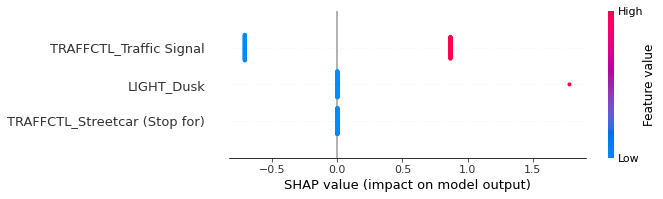

In [17]:
masker = shap.maskers.Independent(data= valid_X[best_variables_forward])
explainer = shap.Explainer(forwards_model, masker= masker,
                           feature_names= valid_X[best_variables_forward].columns, algorithm="linear")
shap_values = explainer.shap_values(valid_X[best_variables_forward])
shap.summary_plot(shap_values, valid_X[best_variables_forward])

In [18]:
pd.DataFrame({'Feature': best_variables_forward, 'coefficients': forwards_model.coef_}).sort_values(by = 'coefficients', ascending = False)

,Feature,coefficients
1,LIGHT_Dusk,1.781562
0,TRAFFCTL_Traffic Signal,1.578541
2,TRAFFCTL_Streetcar (Stop for),1.462020


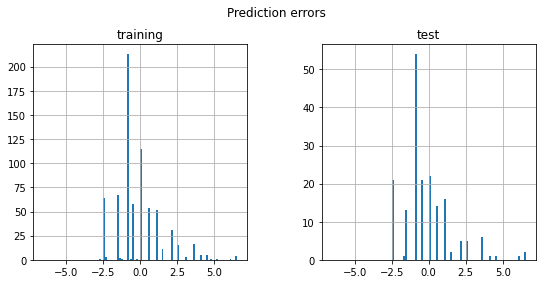

In [19]:
pred_error_train = pd.DataFrame({ 
 'residual': train_Y - forwards_model.predict(train_X[best_variables_forward]), 
 'data set': 'training' 
}) 
pred_error_test = pd.DataFrame({ 
 'residual': valid_Y - forwards_model.predict(valid_X[best_variables_forward]), 
 'data set': 'test' 
}) 

#boxdata_df = pred_error_train.append(pred_error_test, ignore_index=True) 
fig, axes = plt.subplots(nrows=1, ncols=2) 
fig.set_size_inches(9, 4) 
common = {'bins': 100, 'range': [-pred_error_test['residual'].max(), pred_error_test['residual'].max()]} 
pred_error_train.hist(ax=axes[0], **common) 
pred_error_test.hist(ax=axes[1], **common) 
#boxdata_df.boxplot(ax=axes[2], by = 'data set') 
axes[0].set_title('training') 
axes[1].set_title('test') 
#axes[2].set_title(' ') 
#axes[2].set_ylim(-50, 50) 
plt.suptitle('Prediction errors') 
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35) 
#plt.show() 

In [20]:
pred_error_train.skew()

residual    2.24804
dtype: float64

In [21]:
pred_error_test.skew()

residual    1.391361
dtype: float64

<AxesSubplot:xlabel='COUNT'>

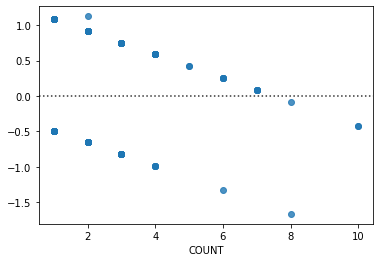

In [22]:
sns.residplot(y = forwards_model.predict(valid_X[best_variables_forward]), x = valid_Y)

In [29]:
backwards_model, best_variables_backward = backward_elimination(train_X.columns, train_model, score_model, verbose = False)

In [30]:
print(regressionSummary(train_Y, backwards_model.predict(train_X[best_variables_backward])))
regressionSummary(valid_Y, backwards_model.predict(valid_X[best_variables_backward]))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1.9254
            Mean Absolute Error (MAE) : 1.2994
          Mean Percentage Error (MPE) : -43.4049
Mean Absolute Percentage Error (MAPE) : 67.6133
None

Regression statistics

                      Mean Error (ME) : -0.1326
       Root Mean Squared Error (RMSE) : 1.6765
            Mean Absolute Error (MAE) : 1.2541
          Mean Percentage Error (MPE) : -49.0192
Mean Absolute Percentage Error (MAPE) : 71.6278


In [31]:
pd.DataFrame({'Feature': best_variables_backward, 'coefficients': backwards_model.coef_}).sort_values(by = 'coefficients', ascending = False)

,Feature,coefficients
1,LIGHT_Dusk,1.779753
0,RDSFCOND_Other,-0.990254
4,TRAFFCTL_Pedestrian Crossover,-1.405342
5,TRAFFCTL_Stop/Yield Sign,-1.550727
3,TRAFFCTL_No Control,-1.580625
2,TRAFFCTL_Controller present,-1.785830


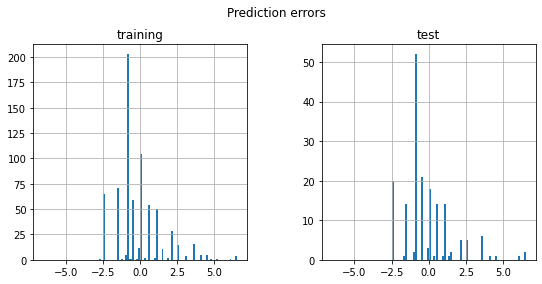

In [25]:
pred_error_train = pd.DataFrame({ 
 'residual': train_Y - backwards_model.predict(train_X[best_variables_backward]), 
 'data set': 'training' 
}) 
pred_error_test = pd.DataFrame({ 
 'residual': valid_Y - backwards_model.predict(valid_X[best_variables_backward]), 
 'data set': 'test' 
}) 

#boxdata_df = pred_error_train.append(pred_error_test, ignore_index=True) 
fig, axes = plt.subplots(nrows=1, ncols=2) 
fig.set_size_inches(9, 4) 
common = {'bins': 100, 'range': [-pred_error_test['residual'].max(), pred_error_test['residual'].max()]} 
pred_error_train.hist(ax=axes[0], **common) 
pred_error_test.hist(ax=axes[1], **common) 
#boxdata_df.boxplot(ax=axes[2], by = 'data set') 
axes[0].set_title('training') 
axes[1].set_title('test') 
#axes[2].set_title(' ') 
#axes[2].set_ylim(-50, 50) 
plt.suptitle('Prediction errors') 
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35) 
#plt.show() 

<AxesSubplot:xlabel='COUNT'>

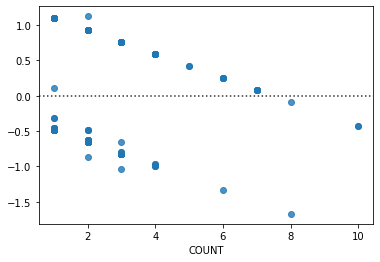

In [26]:
sns.residplot(y = backwards_model.predict(valid_X[best_variables_backward]), x = valid_Y)

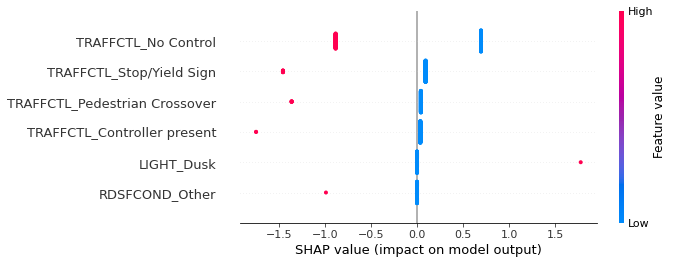

In [27]:
masker = shap.maskers.Independent(data= valid_X[best_variables_backward])
explainer = shap.Explainer(backwards_model, masker= masker,
                           feature_names= valid_X[best_variables_backward].columns, algorithm="linear")
shap_values = explainer.shap_values(valid_X[best_variables_backward])
shap.summary_plot(shap_values, valid_X[best_variables_backward])